In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=2a6952722d014aa842dec742292cb4d2a32635030c8bce8f4e004d79348ea960
  Stored in directory: C:\Users\Chris\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
len(df.columns)

41

In [4]:
features = df.columns[5:37]
features

Index(['koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1'],
      dtype='object')

In [5]:
# Set features. This will also be used as your x values.
selected_features = df[features]
selected_features

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1
0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,...,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105
1,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,...,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233
2,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,...,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201
3,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,...,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334
4,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,...,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,...,8.4,1,5638,169,-152,4.296,0.231,-0.189,1.088,0.313
6987,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,...,453.3,1,5638,139,-166,4.529,0.035,-0.196,0.903,0.237
6988,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,...,10.6,1,6119,165,-220,4.444,0.056,-0.224,1.031,0.341
6989,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,...,12.3,1,6173,193,-236,4.447,0.056,-0.224,1.041,0.341


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
y = df['koi_disposition']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y.value_counts().keys())
y = pd.DataFrame(le.transform(y))
y

,0
0,1
1,2
2,2
3,1
4,1
...,...
6986,2
6987,2
6988,0
6989,2


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)

In [8]:
y_test

,0
4982,2
4866,0
2934,2
5007,2
3869,2
...,...
4006,0
6985,0
1468,1
5138,1


In [9]:
X_test

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1
4982,88.523517,2.337000e-03,-2.337000e-03,189.275600,0.023200,-0.023200,0.9117,0.0087,-0.6588,7.22000,...,7.7,1,3827,56,-75,4.782,0.060,-0.070,0.462,0.050
4866,102.493119,1.322000e-03,-1.322000e-03,166.009400,0.010500,-0.010500,0.9591,0.0000,-0.6667,2.81400,...,8.3,1,5166,171,-140,4.583,0.024,-0.117,0.791,0.132
2934,1.181165,3.890000e-06,-3.890000e-06,132.425220,0.002760,-0.002760,0.6320,0.0450,-0.4740,1.01300,...,14.1,1,5203,169,-154,4.582,0.048,-0.078,0.747,0.098
5007,8.412009,2.360000e-07,-2.360000e-07,139.648520,0.000024,-0.000024,0.5390,0.0040,-0.0010,5.41096,...,5696.2,1,6247,169,-206,4.225,0.185,-0.185,1.314,0.373
3869,1.195515,5.730000e-07,-5.730000e-07,132.303851,0.000410,-0.000410,1.2810,0.0830,-0.0730,5.08340,...,309.1,1,6040,182,-182,4.271,0.220,-0.180,1.155,0.331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,152.825599,7.133000e-04,-7.133000e-04,197.413390,0.004100,-0.004100,0.4090,0.0410,-0.3650,22.68800,...,98.9,1,4991,86,-135,2.933,0.030,-0.030,7.506,0.415
6985,47.109631,1.940000e-04,-1.940000e-04,144.131720,0.003430,-0.003430,1.2300,6.9230,-0.6050,5.74100,...,35.1,1,5258,159,-159,3.597,0.968,-0.242,2.780,1.089
1468,40.836631,3.848000e-04,-3.848000e-04,152.873460,0.007340,-0.007340,0.3630,0.1010,-0.3630,4.95600,...,18.7,1,5529,110,-110,4.457,0.076,-0.093,0.925,0.110
5138,7.584424,2.854000e-04,-2.854000e-04,137.847000,0.049700,-0.049700,0.8150,0.0320,-0.5690,3.91800,...,23.8,2,6264,177,-265,4.133,0.200,-0.180,1.651,0.502


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
X_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [20]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [21]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6582109479305741
Testing Data Score: 0.648741418764302


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6603089834064467
Testing Data Score: 0.6556064073226545


In [14]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.625
k: 3, Train/Test Score: 0.806/0.660
k: 5, Train/Test Score: 0.769/0.660
k: 7, Train/Test Score: 0.756/0.663
k: 9, Train/Test Score: 0.746/0.668
k: 11, Train/Test Score: 0.736/0.674
k: 13, Train/Test Score: 0.735/0.674
k: 15, Train/Test Score: 0.732/0.675
k: 17, Train/Test Score: 0.727/0.679
k: 19, Train/Test Score: 0.725/0.681
k: 21, Train/Test Score: 0.720/0.685
k: 23, Train/Test Score: 0.717/0.680
k: 25, Train/Test Score: 0.715/0.687
k: 27, Train/Test Score: 0.710/0.684
k: 29, Train/Test Score: 0.710/0.686


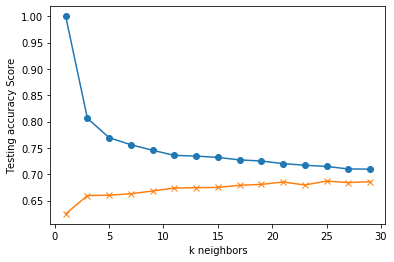

In [17]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_scaled, y_train)
print('k=25 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=25 Test Acc: 0.687


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [26]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [15, 25, 30],
              'weights':['uniform', 'distance'],
              'n_neighbors':[25,29,33,37]}
grid = GridSearchCV(knn, param_grid, verbose=3)

In [27]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

, weights=uniform, score=0.684, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=25, weights=uniform ..
[CV]  algorithm=brute, leaf_size=15, n_neighbors=25, weights=uniform, score=0.666, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=25, weights=uniform ..
[CV]  algorithm=brute, leaf_size=15, n_neighbors=25, weights=uniform, score=0.681, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=25, weights=uniform ..
[CV]  algorithm=brute, leaf_size=15, n_neighbors=25, weights=uniform, score=0.700, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=25, weights=distance .
[CV]  algorithm=brute, leaf_size=15, n_neighbors=25, weights=distance, score=0.696, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=25, weights=distance .
[CV]  algorithm=brute, leaf_size=15, n_neighbors=25, weights=distance, score=0.688, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=25, weights=distance .
[CV]  algorithm=brute, leaf_size=15, n_ne

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 25, 30],
                         'n_neighbors': [25, 29, 33, 37],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [28]:
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 25, 'weights': 'distance'}
0.6875854139529468


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)